# Data Exploration Exercises

- Do your work for this exercise in a file named explore.

# 1. Spam Data

##  a. Load the spam data set.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from sqlalchemy import create_engine

from env import username, password, host

def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### ***View counts and frequency function to analyze the data***

In [11]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [13]:
show_counts_and_ratios(df, "label")

,n,percent
label,,
ham,4825,0.865937
spam,747,0.134063


### ***Clean text data with function***

In [4]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### ***Adding additional stopewords to function***

In [174]:
STOPWORDS = ['r', 'u', '2', 'ltgt', 'x'] # added x for trigrams

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### ***Create labels for text data (ham, spam)***

In [176]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text)) 

In [177]:
len(all_words), len(spam_words), len(ham_words)

(50256, 12153, 38103)

 ## **b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

### ***Looking at the the value counts (Frequencies)***

In [46]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [49]:
print('\n====================\nHam Frequency:\n====================')
print(ham_freq.head())
print('\n\n====================\nSpam Frequency:\n====================')
print(spam_freq.head())
print('\n\n====================\nAll Frequency:\n====================')
print(all_freq.head())


Ham Frequency:
u       1027
im       449
get      314
2        305
ltgt     276
Name: count, dtype: int64


Spam Frequency:
call    359
free    216
2       173
u       155
txt     150
Name: count, dtype: int64


All Frequency:
u       1182
call     600
2        478
im       462
get      397
Name: count, dtype: int64


### ***Put word data into a dataframe***

In [56]:
# create word count for each one and return as type integer for dataframe
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

In [58]:
# rename the col names
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,449,13,462
get,314,83,397
2,305,173,478
ltgt,276,0,276


### ***Noticed that the index does have some words that have no meaning so it would be helpful to include additional stopwords to filter them out of our text data.***

#### ***using (ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']) per the exercise; added into clean function***

In [64]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


### ***Now that a dataframes holds the cleaned text data we can begin to create bigrams for ham and spam!***

In [179]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words)).value_counts().head(10))
ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
Name: count, dtype: int64

In [180]:
spam_bigrams = (pd.Series(nltk.bigrams(spam_words)).value_counts().head(10))
spam_bigrams

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
(prize, guaranteed)    22
(send, stop)           19
(chance, win)          19
(selected, receive)    19
(every, week)          19
Name: count, dtype: int64

### ***bigrams are set and we can begin to visualize them***

In [154]:
# added libs for visuals
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Top 10 Ham_words bigrams horizontal bar chart

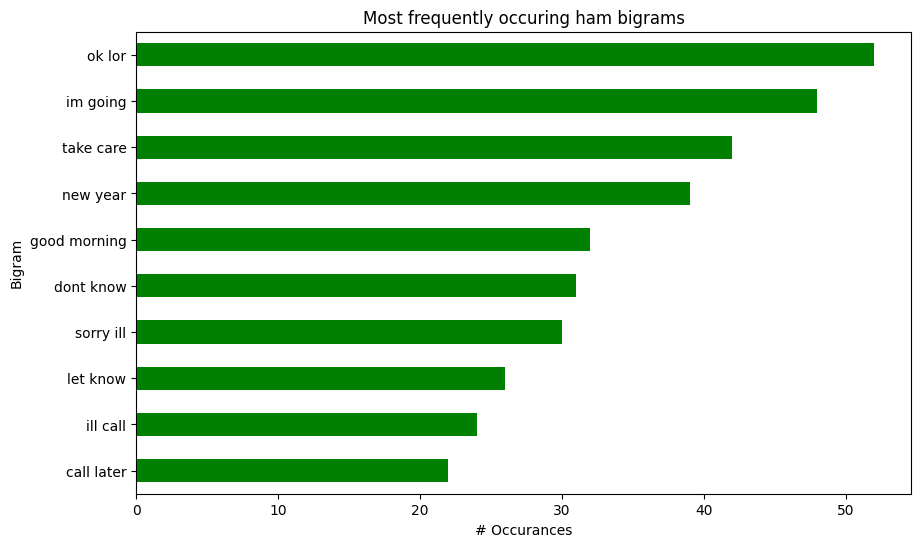

In [181]:
ham_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

## Top 10 Spam_words bigrams horizontal bar chart

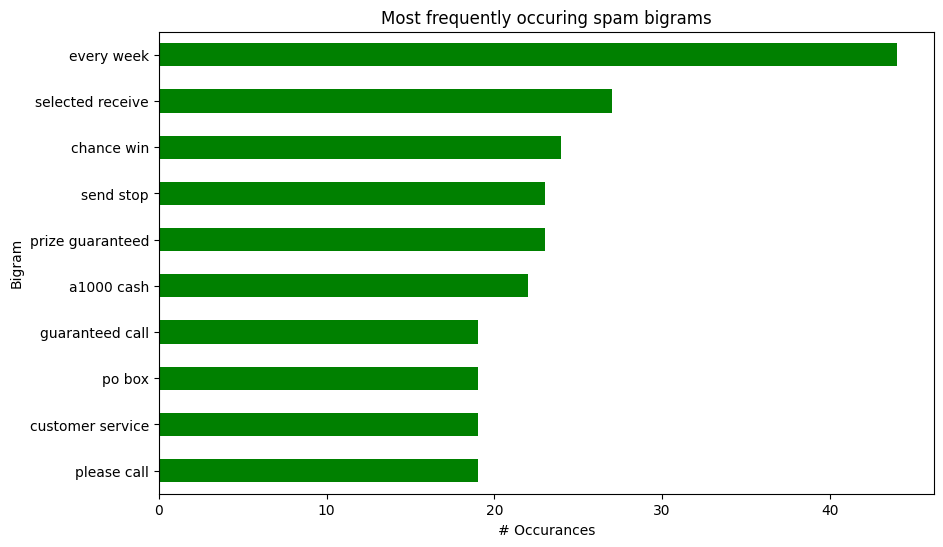

In [182]:
spam_bigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

### ***We can supply our own values to be used to determine how big the words (or phrases) should be through the `generate_from_frequencies` method.***

### ***The supplied values must be in the form of a dictionary where the keys are the words (phrases), and the values are numbers that correspond to the sizes.***

  ------

### ***We'll convert our series to a dictionary, and convert the tuples that make up the index into a single string that holds each phrase.***

## Ham bigrams wordcloud

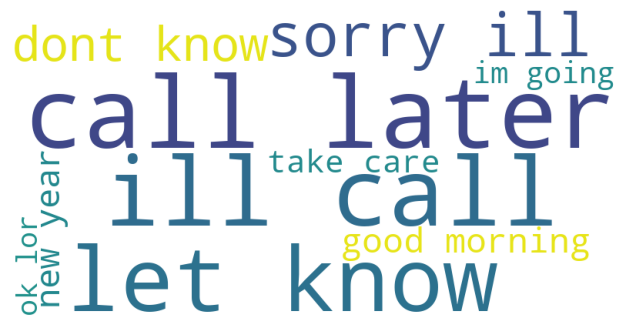

In [183]:
ham_bigrams = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_bigrams)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Spam bigrams wordcloud

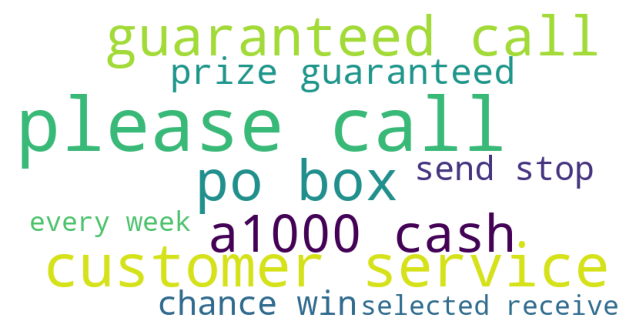

In [184]:
spam_bigrams = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_bigrams)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### ***plotted side by side wordclouds for both***

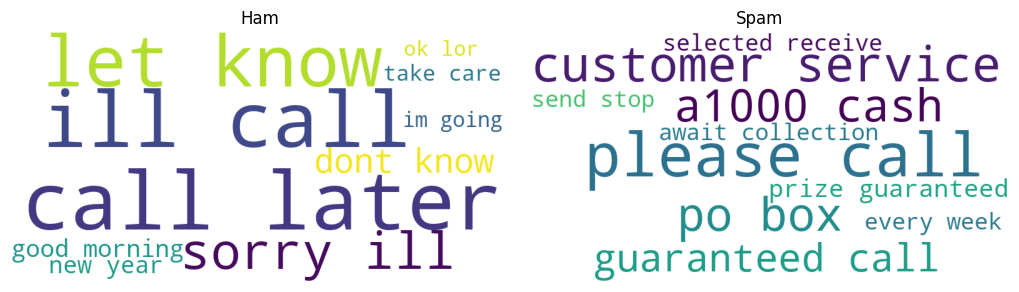

In [149]:
ham_wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_bigrams)
spam_wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_bigrams)

plt.figure(figsize=(10, 6))
axs = [plt.axes([0, .5, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(ham_wordcloud)
axs[1].imshow(spam_wordcloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

##  We can see that when the top ten compared from both ham words and spam words bigrams 'Call' seems to be the most frequent.

##

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [185]:
# Find overlapping bigrams
overlap_bigrams = set(ham_bigrams).intersection(spam_bigrams)

print("Overlapping Bigrams:")
print(overlap_bigrams)

Overlapping Bigrams:
set()


 ## there are no overlapping bigrams

###  d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### ***Created trigrams for spam and ham***

In [189]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(10))
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(10))

print(ham_trigrams)
print(f'\n=======================================\n')
print(spam_bigrams)

(ill, call, later)       42
(sorry, ill, call)       38
(happy, new, year)       19
(pls, send, message)     13
(right, pls, send)       12
(phone, right, pls)      12
(pick, phone, right)     12
(cant, pick, phone)      12
(hi, hi, hi)             11
(good, morning, dear)     7
Name: count, dtype: int64


(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(2003, account, statement)    13
(private, 2003, account)      13
(show, 800, unredeemed)       12
(camcorder, reply, call)      12
(guaranteed, a1000, cash)     12
(every, week, txt)            11
Name: count, dtype: int64


### ***Plotted frequencies of spam and ham (Top 10)***

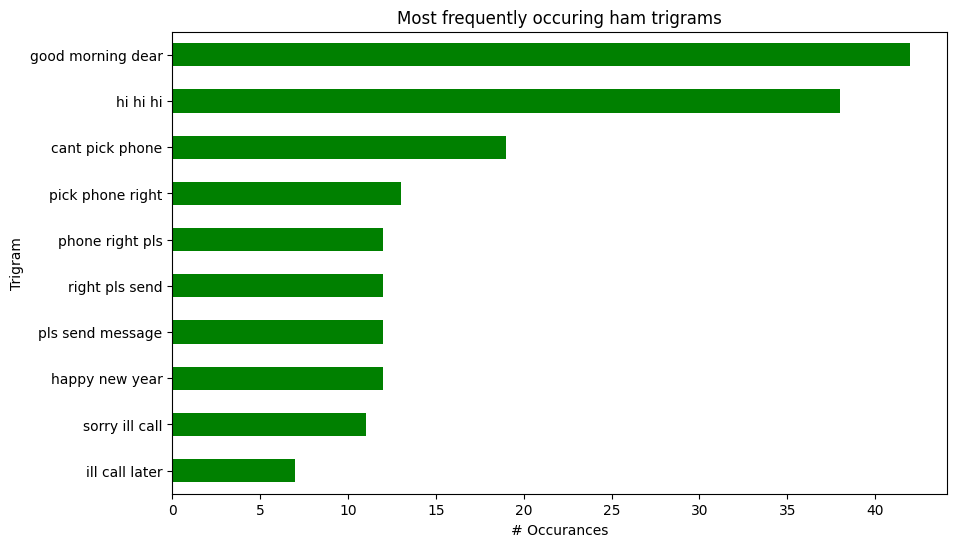

In [187]:
ham_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)
plt.show()

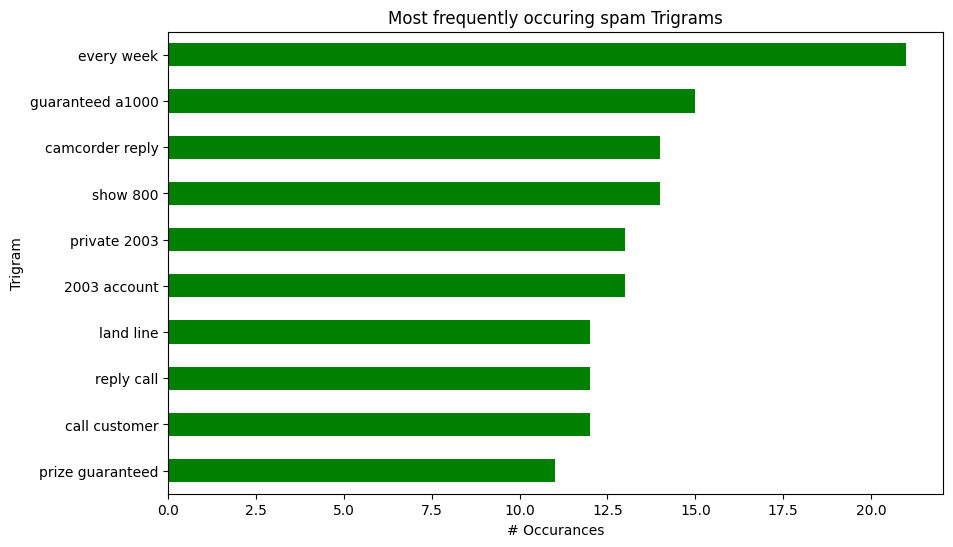

In [191]:
spam_trigrams.sort_values(ascending=True).plot.barh(color='green', width=.5, figsize=(10, 6))

plt.title('Most frequently occuring spam Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.show()

### ***wordcloud for trigrams***

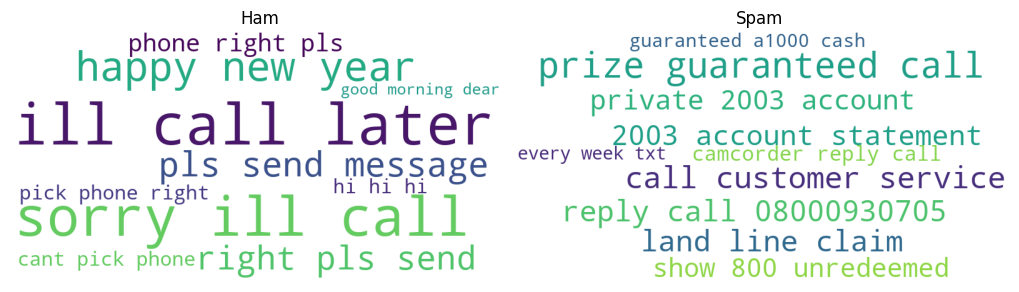

In [193]:
ham_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
spam_trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}

ham_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(ham_trigrams)
spam_wc = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(spam_trigrams)

plt.figure(figsize=(10, 6))
axs = [plt.axes([0, .5, .5, .5]), plt.axes([.5, .5, .5, .5])]

axs[0].imshow(ham_wc)
axs[1].imshow(spam_wc)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

In [195]:
# Find overlapping bigrams
overlap_trigrams = set(ham_trigrams).intersection(spam_trigrams)

print("Overlapping Trigrams:")
print(overlap_trigrams)

Overlapping Trigrams:
set()


# There were no overlapping trigrams, trigrams top ten included call at least once, however they are differenct words in the top return for the text data when turned into trigrams

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [203]:
import acquire as a
df = a.get_blog_articles_data()

In [204]:
df.head()

,title,content
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...


### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.